In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#import pysal as ps # Wczytanie danych z pliku dbf

## Klasyfikacja

Klasyfikacja zalicza się do metod uczenia nadzorowanego (ang. supervised learning). Zbiór (macierz) danych w tym przypadku składa się z obiektów charakteryzujących się atrybutami opisującymi i atrybutem decyzyjnym. Przyjmuje się przy tym, że pomiędzy atrybutami opisującymi, a atrybutem decyzyjnym zachodzi pewien związek przyczynowo-skutkowy zaś kategoryczny atrybut decyzyjny określa klasę do której przynależy obiekt. Zbiór danych jest traktowany jako źródło wiedzy na podstawie którego określa się rodzaj klasyfikatora, a następnie dobiera jego parametry w tzw. procesie uczenia. Gotowy klasyfikator może następnie zostać wykorzystany do określenia przynależności obiektu dla którego znane są jedynie wartości atrybutów opisujących do właściwej klasy. 

Z reguły w celu sprawdzenia poprawności danego algorytmu i sprawdzenia jego skuteczności dla danego zadania klasyfikacji podział zbioru danych wykonywany jest na zbiór uczący i testowy (najczęściej w proporcjach 80/20 lub 70/30). Czasem jednak w przypadku testowania algorytmów i ich dostrajania stosuje się podział 60/20/20, a poszczególne części stanową zbiory odpowiednio: treningowy, walidacyjny i testowy. 

W tym notatniku skupimy się na klasyfikacji metodą **SVM**.


Wygenerujemy teraz nowy zbiór z klastrami bardziej się nakładającymi

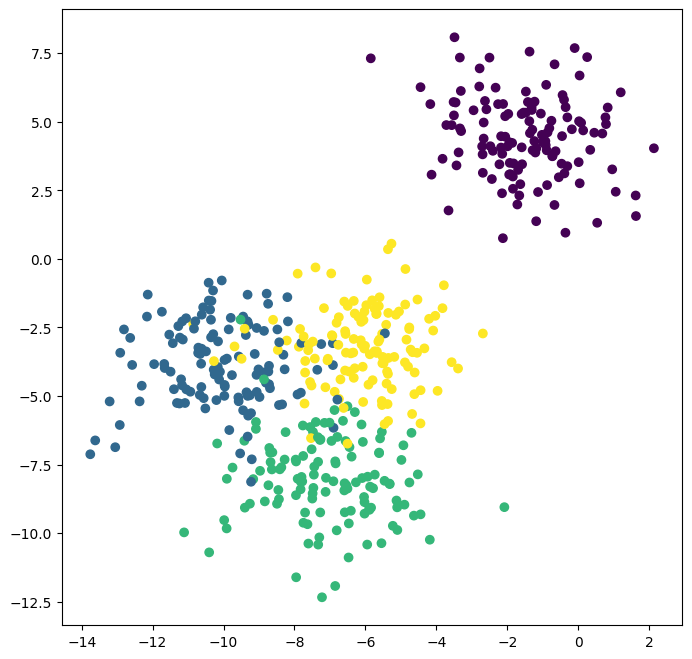

In [18]:
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

Miara $f_1 = 2*\frac{precyzja * czułość}{precyzja+czułość}$. 

Precyzja jest miarą wskazującą z jaką pewnością możemy ufać przewidywaniom pozytywnym: $precyzja = \frac{TP}{TP+FP}$  

Czułość jest miarą wskazującą w jakim procencie klasa faktycznie pozytywna została pokryta przewidywaniem pozytywnym: $czułość = \frac{TP}{TP+FN}$ 


### SVM
Metoda wektorów nośnych/SVM z ang. Support Vector Machine jest algorytmem, którego zadaniem jest podzielenie przestrzeni cech przy pomocy wektorów nośnych. W przypadku 2 cech, które można zobrazować na wykresie płaskim, są to po proste (w przypadku jądra liniowego) lub wielomiany lub funkcja Gaussa (w przypadku jąder radialnych). Jądra liniowe są szybkie i proste w użyciu, jednakże nadają się do klasyfikacji obszarów wyraźnie od siebie odstających. W celu dokładnego wyodrębnienia obszarów należy użyć jąder radialnych, uważając na przeuczenie klasyfikatora.   

,feature1,feature2,label
0,-10.785289,1.728062,1
1,-6.342566,9.911338,0
2,-14.431693,-3.683509,1
3,10.389289,-6.023495,0
4,-4.118290,-5.106990,1
...,...,...,...
495,-13.098551,-3.460073,1
496,-3.288403,-10.189205,1
497,-10.095709,-7.254112,1
498,-6.396800,8.117403,0


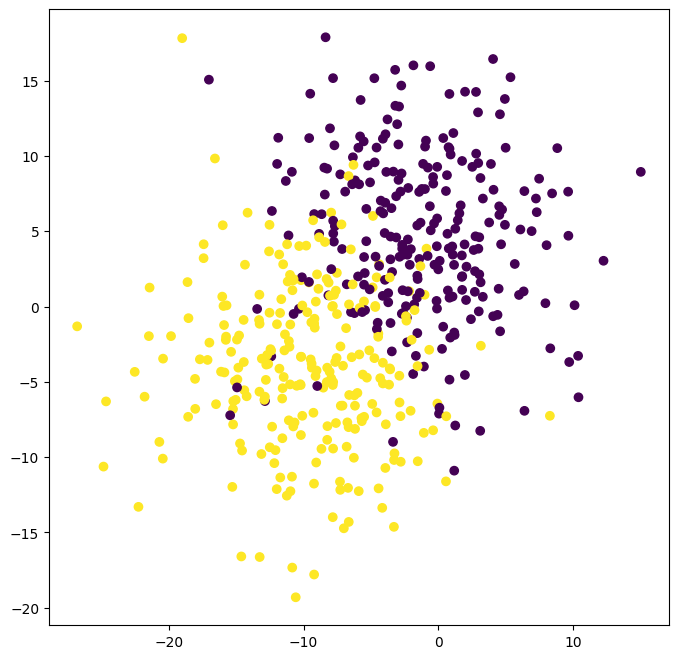

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
X3, y3 = make_blobs(n_samples=500,
                  n_features=2,
                  centers=2,
                  cluster_std=5.5,
                  center_box=(-10.0, 10.0),
                  shuffle=True,    # przetasowanie kolejności próbek
                  random_state=1)  # ustawienie momentu startu zmiennej pseudolosowej w celu zapewnienia powtarzalności wyników
columns = ['feature' + str(x) for x in np.arange(1, X3.shape[1]+1, 1)]
d = {key: values for key, values in zip(columns, X3.T)}
d['label'] = y3
dane3 = pd.DataFrame(d).reindex(columns=columns+['label'])

#Wyświelenie blobów
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(dane3.feature1, dane3.feature2, marker='o', c=dane3.label)

dane3

C:\Users\Stasd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Stasd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Stasd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Stasd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packag

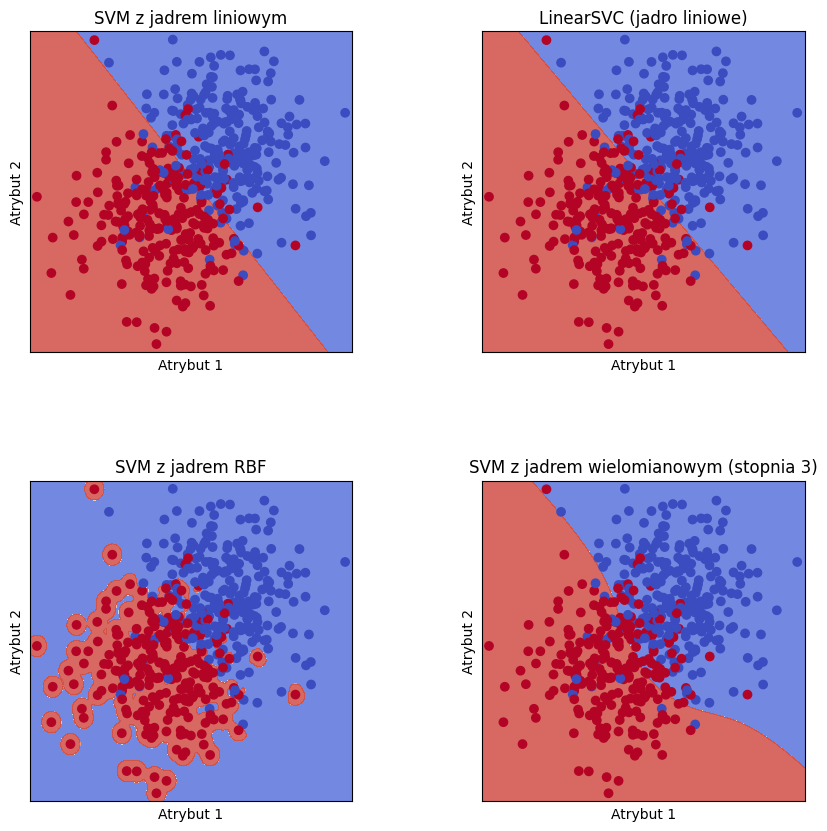

In [20]:
from sklearn import svm
h = .02  # step size in the mesh
cechy = columns
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(dane3[cechy], dane3['label'])
rbf_svc = svm.SVC(kernel='rbf', gamma=2).fit(dane3[cechy], dane3['label'])
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(dane3[cechy], dane3['label'])
lin_svc = svm.LinearSVC(C=C).fit(dane3[cechy], dane3['label'])

# create a mesh to plot in
x_min, x_max = dane3.iloc[:, 0].min() - 1, dane3.iloc[:, 0].max() + 1
y_min, y_max = dane3.iloc[:, 1].min() - 1, dane3.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVM z jadrem liniowym',
          'LinearSVC (jadro liniowe)',
          'SVM z jadrem RBF',
          'SVM z jadrem wielomianowym (stopnia 3)']

plt.figure(figsize=(10,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(dane3.iloc[:, 0], dane3.iloc[:, 1], c=dane3.label, cmap=plt.cm.coolwarm)
    plt.xlabel('Atrybut 1')
    plt.ylabel('Atrybut 2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

## Liniowe SVM

W pakiecie sklearn dostępne są dwa linowe modele svm.SVC i svm.LinearSVC.

### Zadanie 1

Dla klasyfikatorów liniowego svm.SVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

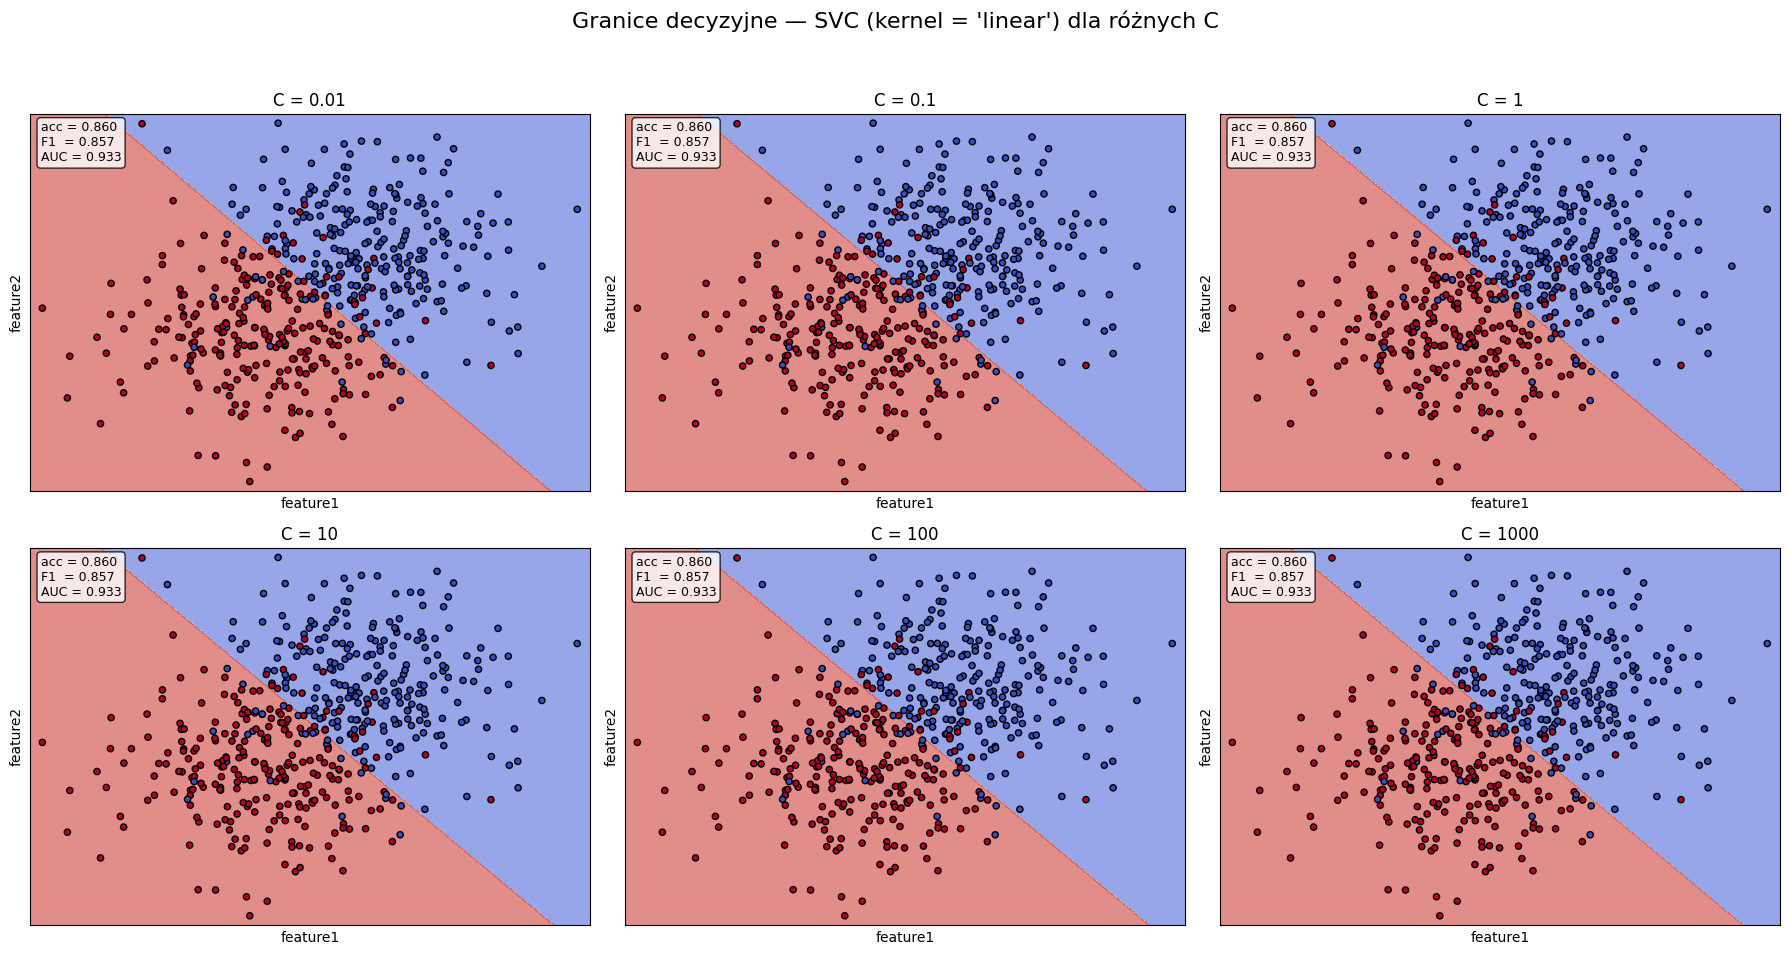

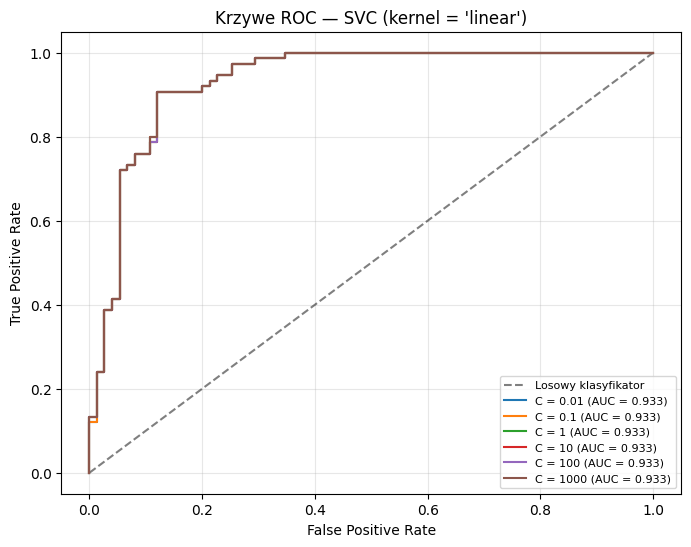


Wyniki (posortowane po AUC):
      C  Accuracy       F1      AUC
1000.00      0.86 0.857143 0.933333
   0.01      0.86 0.857143 0.933156
   0.10      0.86 0.857143 0.933156
   1.00      0.86 0.857143 0.933156
  10.00      0.86 0.857143 0.933156
 100.00      0.86 0.857143 0.933156

Najlepsza wartość C (wg AUC na zbiorze testowym): 1000.0


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Dane wejściowe ---
X = dane3[columns].values
y = dane3["label"].values

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

C_values = [0.01, 0.1, 1, 10, 100, 1000]
results = []

# --- Siatka do granic decyzyjnych (wspólna dla wszystkich C) ---
step = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

grid_x, grid_y = np.meshgrid(
    np.arange(x_min, x_max, step),
    np.arange(y_min, y_max, step)
)

# --- Wykres granic decyzyjnych ---
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.ravel()
fig.suptitle("Granice decyzyjne — SVC (kernel = 'linear') dla różnych C", fontsize=16, y=0.98)

# --- Wykres ROC ---
fig_roc, ax_roc = plt.subplots(figsize=(8, 6))
ax_roc.plot([0, 1], [0, 1], "k--", alpha=0.5, label="Losowy klasyfikator")

for i, C in enumerate(C_values):
    # Uczenie klasyfikatora
    model = SVC(kernel="linear", C=C)
    model.fit(X_tr, y_tr)

    # --- Granice decyzyjne ---
    Z = model.predict(np.c_[grid_x.ravel(), grid_y.ravel()])
    Z = Z.reshape(grid_x.shape)

    ax = axs[i]
    contour = ax.contourf(grid_x, grid_y, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    scatter = ax.scatter(
        X[:, 0], X[:, 1],
        c=y, cmap=plt.cm.coolwarm,
        edgecolors="k", s=20
    )

    ax.set_title(f"C = {C}")
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_xticks([])
    ax.set_yticks([])

    # --- ROC + metryki na zbiorze testowym ---
    scores = model.decision_function(X_te)          # ciągły score
    fpr, tpr, _ = roc_curve(y_te, scores)
    auc_val = roc_auc_score(y_te, scores)
    y_pred = model.predict(X_te)
    f1 = f1_score(y_te, y_pred)
    acc = accuracy_score(y_te, y_pred)

    # zapis do listy wyników
    results.append({
        "C": C,
        "Accuracy": acc,
        "F1": f1,
        "AUC": auc_val
    })

    # krzywa ROC
    ax_roc.plot(fpr, tpr, label=f"C = {C} (AUC = {auc_val:.3f})")

    # krótka informacja na panelu z granicami
    ax.text(
        0.02, 0.98,
        f"acc = {acc:.3f}\nF1  = {f1:.3f}\nAUC = {auc_val:.3f}",
        transform=ax.transAxes,
        va="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
        fontsize=9
    )

# Wykończenie wykresów
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

ax_roc.set_title("Krzywe ROC — SVC (kernel = 'linear')")
ax_roc.set_xlabel("False Positive Rate")
ax_roc.set_ylabel("True Positive Rate")
ax_roc.legend(loc="lower right", fontsize=8)
ax_roc.grid(alpha=0.3)

plt.show()

# --- Tabelaryczne zestawienie wyników i wybór najlepszego C ---
res = pd.DataFrame(results).sort_values("AUC", ascending=False)

print("\nWyniki (posortowane po AUC):")
print(res.to_string(index=False))

best_C = res.iloc[0]["C"]
print(f"\nNajlepsza wartość C (wg AUC na zbiorze testowym): {best_C}")


### Zadanie 2

Dla klasyfikatorów liniowego svm.LinearSVC przeprowadź testy doboru współczynnika regularyzacji C dla wartości [0.01, 0.1, 1, 10, 100, 1000]. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. Na podstawie otrzymanych wyników określ najlepszą wartość współczynnika C.

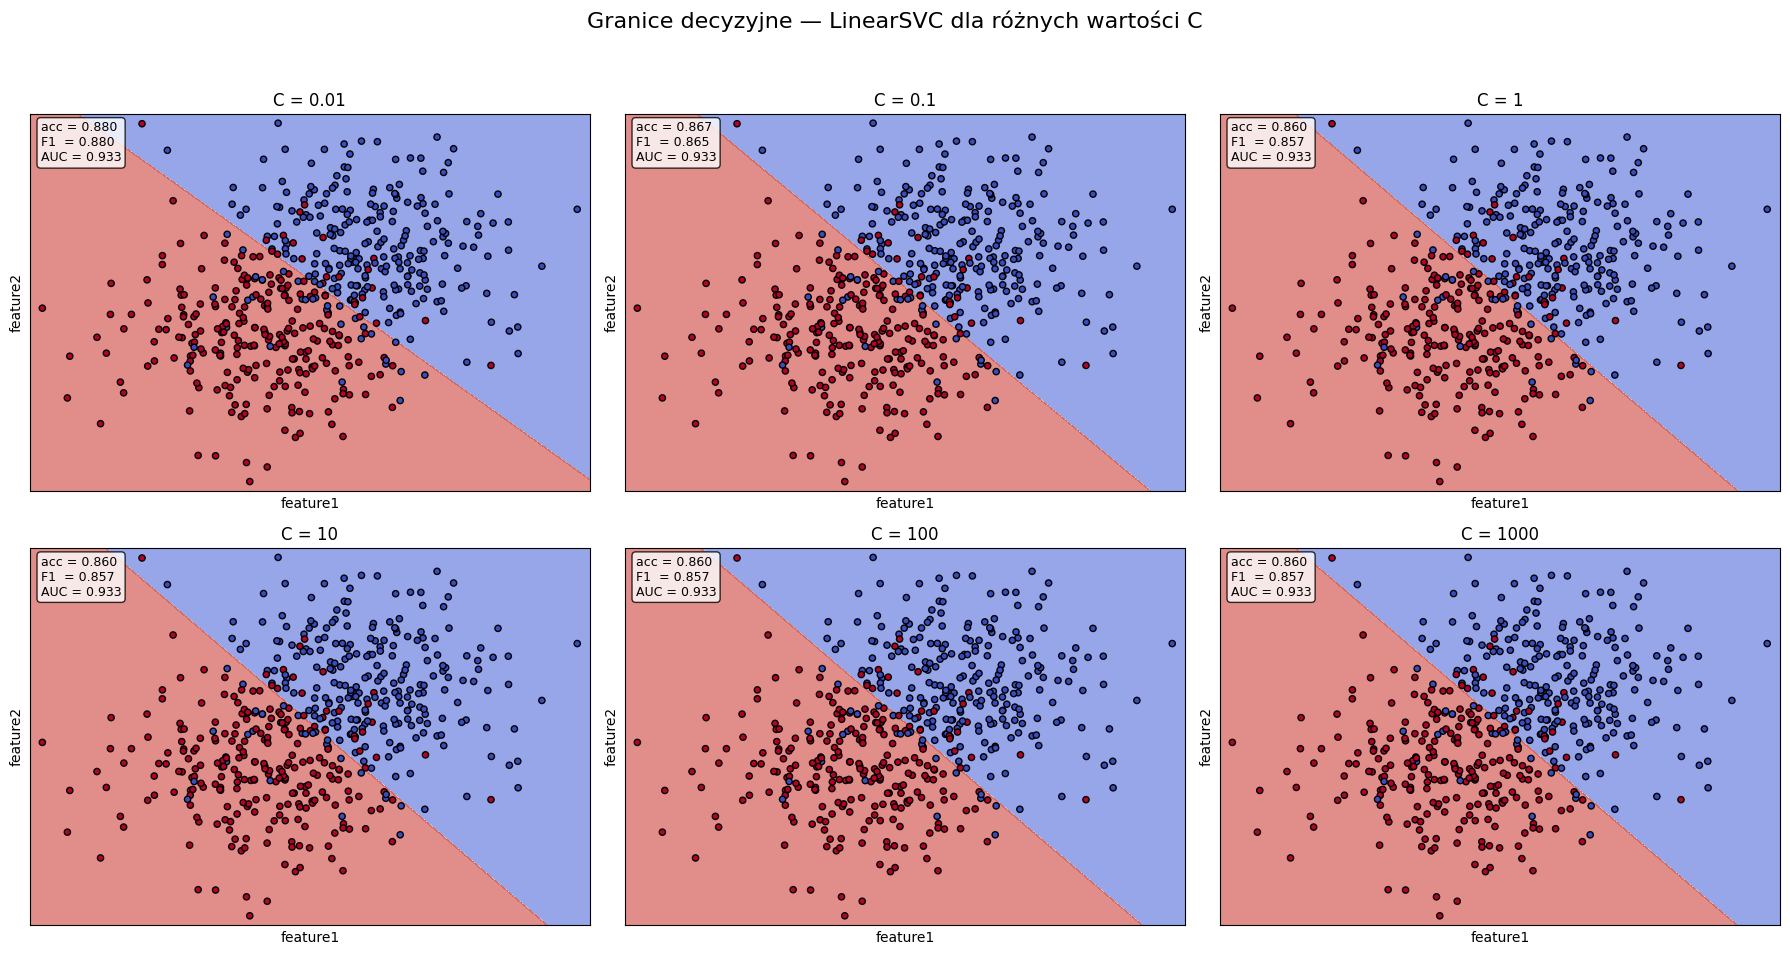

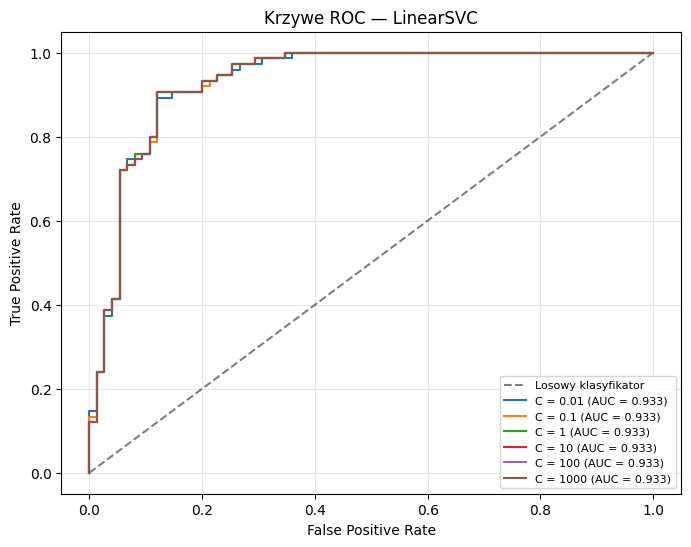


Wyniki (posortowane po AUC):
      C  Accuracy       F1      AUC
   1.00  0.860000 0.857143 0.933333
   0.10  0.866667 0.864865 0.933156
  10.00  0.860000 0.857143 0.933156
 100.00  0.860000 0.857143 0.933156
1000.00  0.860000 0.857143 0.933156
   0.01  0.880000 0.880000 0.932800

Najlepsza wartość C (wg AUC na zbiorze testowym): 1.0


In [22]:
from sklearn.svm import LinearSVC
# --- Dane wejściowe ---
X = dane3[columns].values
y = dane3["label"].values

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

C_grid = [0.01, 0.1, 1, 10, 100, 1000]
summary = []

# --- Siatka do wizualizacji granic decyzyjnych ---
step = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

grid_x, grid_y = np.meshgrid(
    np.arange(x_min, x_max, step),
    np.arange(y_min, y_max, step)
)

# --- Wykres granic decyzyjnych ---
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.ravel()
fig.suptitle("Granice decyzyjne — LinearSVC dla różnych wartości C", fontsize=16, y=0.98)

# --- Wykres ROC ---
fig_roc, ax_roc = plt.subplots(figsize=(8, 6))
ax_roc.plot([0, 1], [0, 1], "k--", alpha=0.5, label="Losowy klasyfikator")

for i, C in enumerate(C_grid):
    # Uczenie klasyfikatora
    clf = LinearSVC(C=C, dual="auto", random_state=42)
    clf.fit(X_tr, y_tr)

    # --- Granice decyzyjne ---
    Z = clf.predict(np.c_[grid_x.ravel(), grid_y.ravel()])
    Z = Z.reshape(grid_x.shape)

    ax = axs[i]
    ax.contourf(grid_x, grid_y, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    ax.scatter(
        X[:, 0], X[:, 1],
        c=y, cmap=plt.cm.coolwarm,
        edgecolors="k", s=20
    )

    ax.set_title(f"C = {C}")
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_xticks([])
    ax.set_yticks([])

    # --- ROC + metryki na zbiorze testowym ---
    scores = clf.decision_function(X_te)         # LinearSVC: score ciągły
    fpr, tpr, _ = roc_curve(y_te, scores)
    auc_val = roc_auc_score(y_te, scores)
    y_pred = clf.predict(X_te)
    f1 = f1_score(y_te, y_pred)
    acc = accuracy_score(y_te, y_pred)

    summary.append({
        "C": C,
        "Accuracy": acc,
        "F1": f1,
        "AUC": auc_val
    })

    ax_roc.plot(fpr, tpr, label=f"C = {C} (AUC = {auc_val:.3f})")

    # krótka notka na panelu
    ax.text(
        0.02, 0.98,
        f"acc = {acc:.3f}\nF1  = {f1:.3f}\nAUC = {auc_val:.3f}",
        transform=ax.transAxes,
        va="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
        fontsize=9
    )

# Wykończenie wykresów
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

ax_roc.set_title("Krzywe ROC — LinearSVC")
ax_roc.set_xlabel("False Positive Rate")
ax_roc.set_ylabel("True Positive Rate")
ax_roc.legend(loc="lower right", fontsize=8)
ax_roc.grid(alpha=0.3)

plt.show()

# --- Zestawienie wyników i wybór najlepszego C ---
res = pd.DataFrame(summary).sort_values("AUC", ascending=False)

print("\nWyniki (posortowane po AUC):")
print(res.to_string(index=False))

best_C = res.iloc[0]["C"]
print(f"\nNajlepsza wartość C (wg AUC na zbiorze testowym): {best_C}")


### Zadanie 3

Dla klasyfikatorów SVM z jądrem wielomianowym dokonaj doboru stopnia wielomianu i współczynnika regularyzacji C. Pokaż granice decyzyjne oraz wykreśl krzywe ROC. 

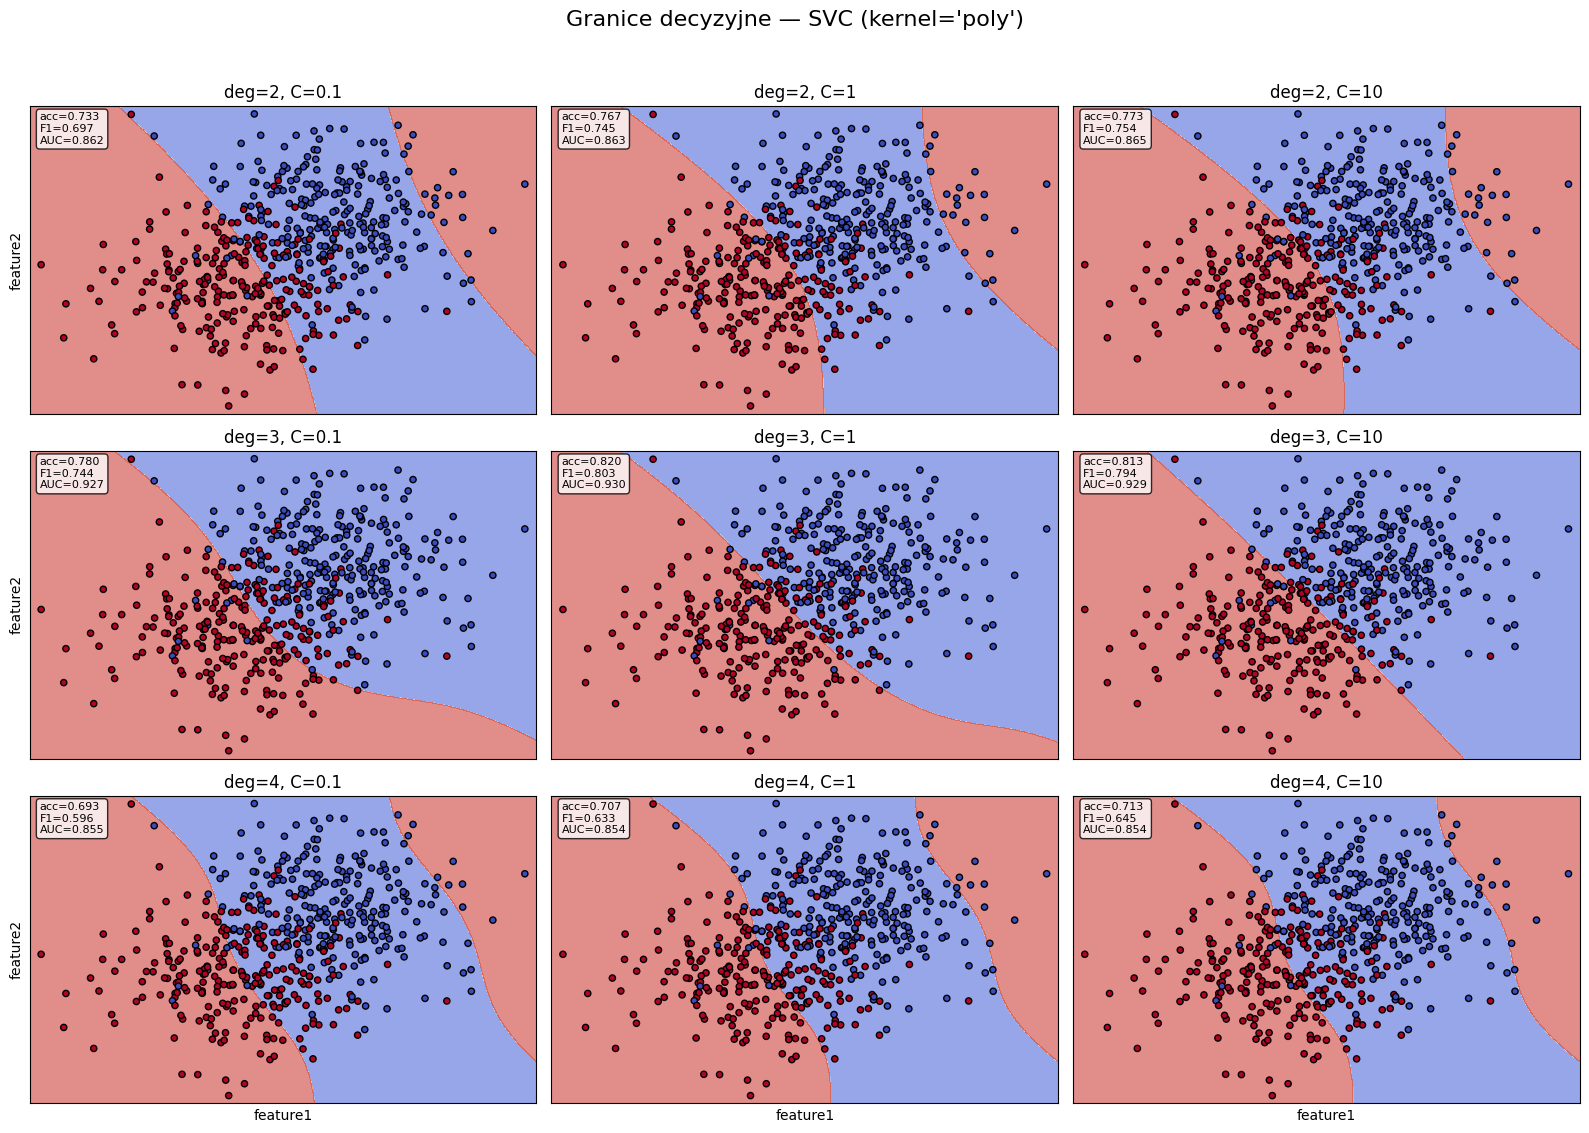

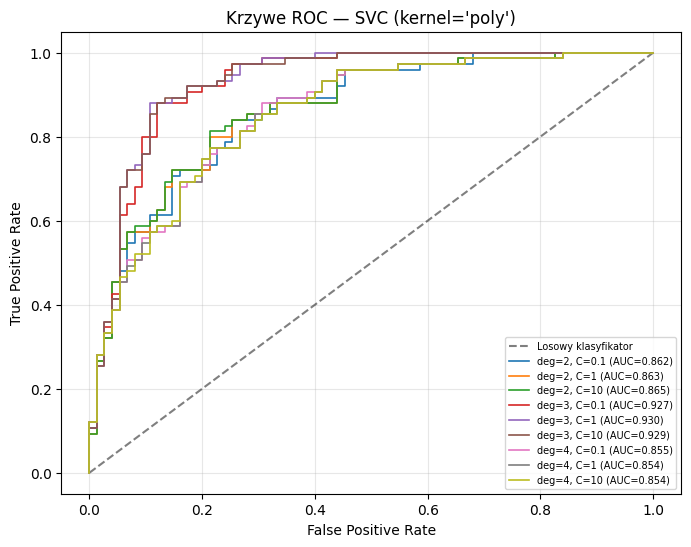


Wyniki (posortowane po AUC):
 degree    C  Accuracy       F1      AUC
      3  1.0  0.820000 0.802920 0.930311
      3 10.0  0.813333 0.794118 0.929422
      3  0.1  0.780000 0.744186 0.926933
      2 10.0  0.773333 0.753623 0.864533
      2  1.0  0.766667 0.744526 0.863289
      2  0.1  0.733333 0.696970 0.861511
      4  0.1  0.693333 0.596491 0.854756
      4  1.0  0.706667 0.633333 0.853511
      4 10.0  0.713333 0.644628 0.853511

Najlepsze parametry (wg AUC na zbiorze testowym): degree=3.0, C=1.0


In [23]:
# --- Dane ---
X = dane3[columns].values
y = dane3["label"].values

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

deg_list = [2, 3, 4]
C_list   = [0.1, 1, 10]
results  = []

# --- Siatka do granic ---
step = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
gx, gy = np.meshgrid(
    np.arange(x_min, x_max, step),
    np.arange(y_min, y_max, step)
)

fig, axs = plt.subplots(3, 3, figsize=(16, 12))
axs = axs.reshape(3, 3)
fig.suptitle("Granice decyzyjne — SVC (kernel='poly')", fontsize=16, y=0.97)

fig_roc, ax_roc = plt.subplots(figsize=(8, 6))
ax_roc.plot([0, 1], [0, 1], "k--", alpha=0.5, label="Losowy klasyfikator")

for r, d in enumerate(deg_list):
    for c, C in enumerate(C_list):

        # TU: dokładnie te same ustawienia jak u Ciebie
        clf = SVC(kernel="poly", degree=d, C=C)
        clf.fit(X_tr, y_tr)

        # Granice
        Z = clf.predict(np.c_[gx.ravel(), gy.ravel()]).reshape(gx.shape)
        ax = axs[r, c]
        ax.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,
                   edgecolors="k", s=20)

        if r == len(deg_list) - 1:
            ax.set_xlabel(columns[0])
        if c == 0:
            ax.set_ylabel(columns[1])

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"deg={d}, C={C}")

        # ROC + metryki
        scores = clf.decision_function(X_te)
        fpr, tpr, _ = roc_curve(y_te, scores)
        auc_val = auc(fpr, tpr)          # tak jak w Twoim kodzie
        y_pred = clf.predict(X_te)
        f1 = f1_score(y_te, y_pred)
        acc = accuracy_score(y_te, y_pred)

        results.append({
            "degree": d,
            "C": C,
            "Accuracy": acc,
            "F1": f1,
            "AUC": auc_val
        })

        ax_roc.plot(fpr, tpr,
                    label=f"deg={d}, C={C} (AUC={auc_val:.3f})",
                    linewidth=1.2)

        ax.text(
            0.02, 0.98,
            f"acc={acc:.3f}\nF1={f1:.3f}\nAUC={auc_val:.3f}",
            transform=ax.transAxes,
            va="top",
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
            fontsize=8
        )

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

ax_roc.set_title("Krzywe ROC — SVC (kernel='poly')")
ax_roc.set_xlabel("False Positive Rate")
ax_roc.set_ylabel("True Positive Rate")
ax_roc.legend(loc="lower right", fontsize=7)
ax_roc.grid(alpha=0.3)

plt.show()

# Podsumowanie
res = pd.DataFrame(results).sort_values("AUC", ascending=False)
print("\nWyniki (posortowane po AUC):")
print(res.to_string(index=False))

best_deg = res.iloc[0]["degree"]
best_C   = res.iloc[0]["C"]
print(f"\nNajlepsze parametry (wg AUC na zbiorze testowym): degree={best_deg}, C={best_C}")


### Zadanie 4

Dla klasyfikatorów SVM z jądrem Gaussa dokonaj doboru współczynnika wariancji. Pokaż granice decyzyjne dla kilku wybranych współczynników oraz wykreśl krzywe ROC. 

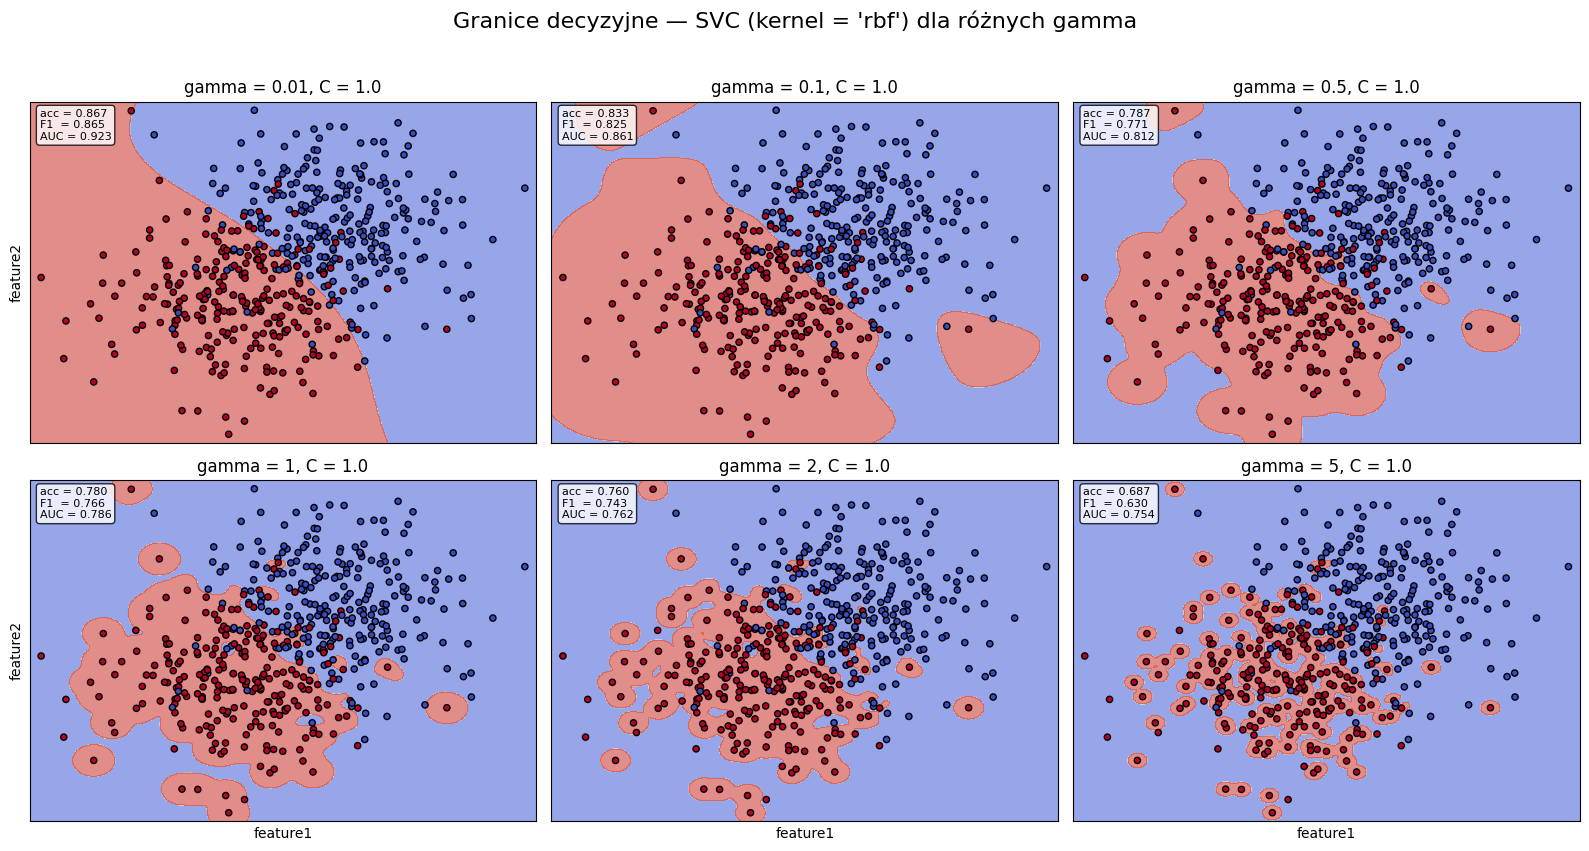

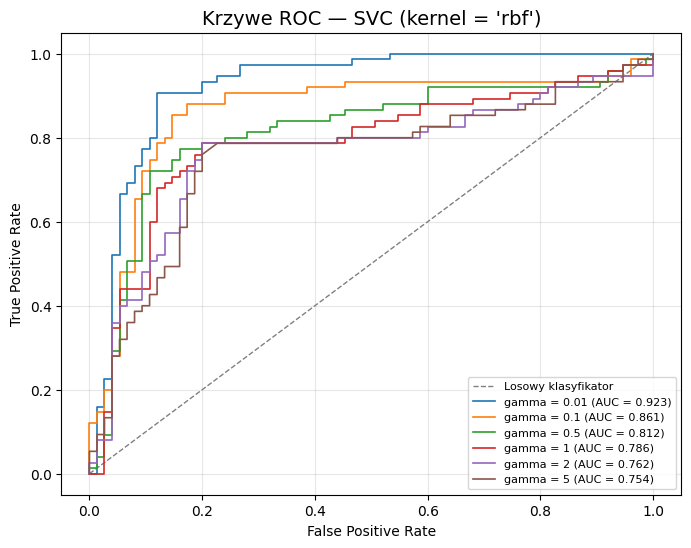


Wyniki (posortowane po AUC):
 gamma   C  Accuracy       F1      AUC
  0.01 1.0  0.866667 0.864865 0.923378
  0.10 1.0  0.833333 0.825175 0.860800
  0.50 1.0  0.786667 0.771429 0.812089
  1.00 1.0  0.780000 0.765957 0.785778
  2.00 1.0  0.760000 0.742857 0.762489
  5.00 1.0  0.686667 0.629921 0.754133

Najlepszy gamma (wg AUC na zbiorze testowym): 0.01 (C = 1.0)


In [24]:


# --- Dane wejściowe ---
X = dane3[columns].values
y = dane3["label"].values

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

gamma_list = [0.01, 0.1, 0.5, 1, 2, 5]
C_const = 1.0
results = []

# --- Siatka do rysowania granic decyzyjnych ---
step = 0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

grid_x, grid_y = np.meshgrid(
    np.arange(x_min, x_max, step),
    np.arange(y_min, y_max, step)
)

# --- Wykres granic decyzyjnych (2 wiersze x 3 kolumny) ---
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
axs = axs.ravel()
fig.suptitle("Granice decyzyjne — SVC (kernel = 'rbf') dla różnych gamma", fontsize=16, y=0.97)

# --- Wykres ROC ---
fig_roc, ax_roc = plt.subplots(figsize=(8, 6))
ax_roc.plot([0, 1], [0, 1], linestyle="--", color="gray", linewidth=1, label="Losowy klasyfikator")

for i, gamma in enumerate(gamma_list):
    # Uczenie modelu z danym gamma
    clf = SVC(
        kernel="rbf",
        gamma=gamma,
        C=C_const
    )
    clf.fit(X_tr, y_tr)

    # --- Granice decyzyjne ---
    Z = clf.predict(np.c_[grid_x.ravel(), grid_y.ravel()])
    Z = Z.reshape(grid_x.shape)

    ax = axs[i]
    ax.contourf(grid_x, grid_y, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    ax.scatter(
        X[:, 0], X[:, 1],
        c=y, cmap=plt.cm.coolwarm,
        edgecolors="k", s=20
    )

    ax.set_title(f"gamma = {gamma}, C = {C_const}")
    ax.set_xticks([])
    ax.set_yticks([])

    # Podpisy osi tylko na zewnętrznych wykresach
    if i // 3 == 1:   # dolny rząd
        ax.set_xlabel(columns[0])
    if i % 3 == 0:    # lewa kolumna
        ax.set_ylabel(columns[1])

    # --- ROC + metryki na zbiorze testowym ---
    scores = clf.decision_function(X_te)
    fpr, tpr, _ = roc_curve(y_te, scores)
    auc_val = roc_auc_score(y_te, scores)
    y_pred = clf.predict(X_te)
    f1 = f1_score(y_te, y_pred)
    acc = accuracy_score(y_te, y_pred)

    results.append({
        "gamma": gamma,
        "C": C_const,
        "Accuracy": acc,
        "F1": f1,
        "AUC": auc_val
    })

    ax_roc.plot(
        fpr, tpr,
        label=f"gamma = {gamma} (AUC = {auc_val:.3f})",
        linewidth=1.2
    )

    # krótka notka na panelu
    ax.text(
        0.02, 0.98,
        f"acc = {acc:.3f}\nF1  = {f1:.3f}\nAUC = {auc_val:.3f}",
        transform=ax.transAxes,
        va="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
        fontsize=8
    )

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

ax_roc.set_title("Krzywe ROC — SVC (kernel = 'rbf')", fontsize=14)
ax_roc.set_xlabel("False Positive Rate")
ax_roc.set_ylabel("True Positive Rate")
ax_roc.grid(alpha=0.3)
ax_roc.legend(loc="lower right", fontsize=8)

plt.show()

# --- Zestawienie wyników i wybór najlepszego gamma ---
res = pd.DataFrame(results).sort_values("AUC", ascending=False)

print("\nWyniki (posortowane po AUC):")
print(res.to_string(index=False))

best_gamma = res.iloc[0]["gamma"]
print(f"\nNajlepszy gamma (wg AUC na zbiorze testowym): {best_gamma} (C = {C_const})")
